# Plan
- Download the dataset and do some initial preparation
- Split the data into train , validation and test set
- Looking at features importance
- Transform categorical variables into numeric variables
- Train a logistic regression
- Model evaluation
- Paramater tunning


## Download the dataset

In [2]:
#!kaggle datasets download -d blastchar/telco-customer-churn

In [3]:
# Unzip the dataset
#import zipfile

# Unzipping the downloaded file
#with zipfile.ZipFile("C:/Users/hp\Desktop/Ml_Projects/churn_classification/telco-customer-churn.zip", "r") as zip_ref:
    #zip_ref.extractall("churn_classification")  # Extract to a specific folder


### Initial data preparation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read the dataset
df = pd.read_csv('C:/Users/hp/Desktop/Ml_Projects/churn_classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
# Types of df's columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# convert total charge into numeric column(forcing it with errors='coerce)
df[pd.to_numeric(df['TotalCharges'] , errors = 'coerce').isnull()][['customerID' , 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors = 'coerce')
# filling missing values with 0
df.TotalCharges = df.TotalCharges.fillna(0)

In [12]:
# Uniforming column's names 
df.columns = df.columns.str.lower().str.replace(" " , "_")
# Same thing for string columns
string_cols = list(df.dtypes[df.dtypes=='object'].index)
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(" " , "_")
    

In [13]:
# target value
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [14]:
df.churn = (df.churn == 'yes').astype(int)

In [15]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split
full_df_train , df_test = train_test_split(df , test_size = 0.2 , random_state = 1 , shuffle = True)

In [17]:
full_df_train.head().T

,1814,5946,3881,2389,3676
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


In [18]:
# splitting the training set to train and validating
df_train , df_val = train_test_split(full_df_train , test_size = 0.33 , shuffle = True )


In [19]:
# target variable
y_train = df_train['churn'].values
y_val = df_val['churn'].values

In [20]:
df_train.drop('churn' , axis = 1 , inplace=True)
df_val.drop('churn' , axis = 1 , inplace = True)

## EDA

In [21]:
# Checking for missing data
full_df_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [22]:
# Target variable distribution
full_df_train.churn.value_counts()/len(full_df_train.churn)

churn
0    0.730032
1    0.269968
Name: count, dtype: float64

In [23]:
# using the mean to calculate churn rate
full_df_train.churn.mean()

np.float64(0.26996805111821087)

In [24]:
# categorical columns
categorical = list(df.dtypes[df.dtypes=='object'].index)
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [25]:
numerical = list(set(list(df.dtypes.index)) - set(categorical))
numerical

['totalcharges', 'churn', 'tenure', 'monthlycharges', 'seniorcitizen']

In [26]:
# unique values
full_df_train[categorical].nunique()

customerid          5634
gender                 2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

## Feature importance

### Churn rate in each value's group of categorical features

In [27]:
# gender variable
full_df_train.gender.value_counts()/len(full_df_train.gender)

gender
male      0.503727
female    0.496273
Name: count, dtype: float64

In [28]:
# mean of every value in the variable
male_mean = full_df_train[full_df_train.gender == 'male'].churn.mean()
female_mean = full_df_train[full_df_train.gender == 'female'].churn.mean()

In [29]:
print(f'male churn rate : {male_mean}\nfemale churn rate : {female_mean}')

male churn rate : 0.2632135306553911
female churn rate : 0.27682403433476394


In [30]:
# partner variable
full_df_train.partner.value_counts()/len(full_df_train.partner)

partner
no     0.520412
yes    0.479588
Name: count, dtype: float64

In [31]:
with_partner = full_df_train[full_df_train.partner == 'yes'].churn.mean()
no_partner = full_df_train[full_df_train.partner == 'no'].churn.mean()
print(f'with_partner churn rate : {with_partner}\n no_partner churn rate : {no_partner}')

with_partner churn rate : 0.20503330866025166
 no_partner churn rate : 0.3298090040927694


### Risk ratio

In [32]:
global_mean = full_df_train.churn.mean()
df_group = full_df_train.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean

In [33]:
df_group.head()

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [34]:
# All categorical variables
from IPython.display import display
for col in categorical:
    df_group = full_df_train.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
customerid,,,
0002-orfbo,0.0,-0.269968,0.000000
0004-tlhlj,1.0,0.730032,3.704142
0011-igkff,1.0,0.730032,3.704142
0013-exchz,1.0,0.730032,3.704142
0013-mhzwf,0.0,-0.269968,0.000000
...,...,...,...
9987-lutyd,0.0,-0.269968,0.000000
9992-rramn,1.0,0.730032,3.704142
9992-ujoel,0.0,-0.269968,0.000000


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [35]:
df_group = full_df_train.groupby(by='seniorcitizen').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
display(df_group)

,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


### Mutual information

In [36]:
from sklearn.metrics import mutual_info_score
def calculate_mi(serie):
    return mutual_info_score(serie , full_df_train.churn)

In [37]:
df_mi = full_df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')
df_mi

,MI
customerid,0.583227
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581


### Correlation

In [38]:
full_df_train[numerical].corrwith(full_df_train.churn)

totalcharges     -0.196353
churn             1.000000
tenure           -0.351885
monthlycharges    0.196805
seniorcitizen     0.141966
dtype: float64

## Feature engineering

### One-hot Encoding 

In [39]:
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [40]:
numerical

['totalcharges', 'churn', 'tenure', 'monthlycharges', 'seniorcitizen']

In [41]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [42]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')


In [43]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 29,
 'monthlycharges': 78.9,
 'totalcharges': 2384.15}

In [44]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [45]:
X_train = dv.transform(train_dict)

In [46]:
X_train[0]


array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 7.89000e+01, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 2.90000e+01, 2.38415e+03])

In [47]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

## Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear' , random_state = 1)
model.fit(X_train , y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [49]:
# Use the model on validation dataset
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [50]:
y_pred = model.predict_proba(X_val)[: , 1]

In [51]:
y_pred

array([0.29048062, 0.1605623 , 0.02128112, ..., 0.56424255, 0.44121603,
       0.13268505])

In [52]:
churn = y_pred >=0.5
churn

array([False, False, False, ...,  True, False, False])

In [53]:
# Accuracy 
(y_val == churn).mean()

np.float64(0.8016129032258065)

In [54]:
model.intercept_

array([-0.14645716])

In [55]:
model.coef_[0]

array([ 5.26376963e-01, -9.84127274e-02, -5.74421392e-01, -9.46990098e-02,
       -5.17581467e-02,  6.39954889e-02, -1.10173356e-01, -1.00279289e-01,
       -1.25757487e-01, -2.06996699e-02, -4.39001551e-01,  4.02717751e-01,
       -1.10173356e-01,  5.39845595e-03, -2.78155199e-01,  1.35802167e-01,
       -4.10412456e-03,  1.00707802e-01, -1.10173356e-01, -1.36991603e-01,
        1.19076864e-01, -1.10173356e-01, -1.55360665e-01, -2.23820492e-01,
        7.73633354e-02, -7.18747447e-02, -7.45824117e-02, -9.67639784e-02,
       -1.80843939e-01,  2.20036248e-01, -8.88854866e-02,  1.35802167e-01,
       -2.82259323e-01,  2.38363569e-01, -9.36999635e-02, -1.10173356e-01,
        5.74161630e-02, -4.92234226e-02, -1.10173356e-01,  1.29396221e-02,
        2.08195249e-01, -1.10173356e-01, -2.44479049e-01, -5.71238112e-02,
        2.55267663e-04])

In [56]:
dict(zip(dv.get_feature_names_out() , model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.526),
 'contract=one_year': np.float64(-0.098),
 'contract=two_year': np.float64(-0.574),
 'dependents=no': np.float64(-0.095),
 'dependents=yes': np.float64(-0.052),
 'deviceprotection=no': np.float64(0.064),
 'deviceprotection=no_internet_service': np.float64(-0.11),
 'deviceprotection=yes': np.float64(-0.1),
 'gender=female': np.float64(-0.126),
 'gender=male': np.float64(-0.021),
 'internetservice=dsl': np.float64(-0.439),
 'internetservice=fiber_optic': np.float64(0.403),
 'internetservice=no': np.float64(-0.11),
 'monthlycharges': np.float64(0.005),
 'multiplelines=no': np.float64(-0.278),
 'multiplelines=no_phone_service': np.float64(0.136),
 'multiplelines=yes': np.float64(-0.004),
 'onlinebackup=no': np.float64(0.101),
 'onlinebackup=no_internet_service': np.float64(-0.11),
 'onlinebackup=yes': np.float64(-0.137),
 'onlinesecurity=no': np.float64(0.119),
 'onlinesecurity=no_internet_service': np.float64(-0.11),
 'onlinesecurity=yes': np

### Simple model

In [57]:
small_subset = ['contract' , 'tenure' , 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient = 'records')
dv_small = DictVectorizer(sparse = False)
dv_small.fit(train_dict_small)
X_small_train = dv_small.transform(train_dict_small)

In [58]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [59]:
model_small = LogisticRegression(random_state=1)
model_small.fit(X_small_train , y_train)

LogisticRegression(random_state=1)

In [60]:
model_small.intercept_

array([-0.72917819])

In [61]:
dict(zip(dv_small.get_feature_names_out() , model_small.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.979),
 'contract=one_year': np.float64(-0.182),
 'contract=two_year': np.float64(-1.516),
 'tenure': np.float64(-0.092),
 'totalcharges': np.float64(0.001)}

### Using the model

In [62]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
 }
X_test = dv.transform([customer])

In [63]:
model.predict_proba(X_test)

array([[0.95018794, 0.04981206]])

In [64]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',

    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
 }

In [65]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

np.float64(0.8289666539352016)

## Removing some features

In [66]:
df_mi.sort_values

<bound method DataFrame.sort_values of                         MI
customerid        0.583227
contract          0.098320
onlinesecurity    0.063085
techsupport       0.061032
internetservice   0.055868
onlinebackup      0.046923
deviceprotection  0.043453
paymentmethod     0.043210
streamingtv       0.031853
streamingmovies   0.031581
paperlessbilling  0.017589
dependents        0.012346
partner           0.009968
multiplelines     0.000857
phoneservice      0.000229
gender            0.000117>

we will train the model after removing phoneservice and gneder

In [67]:

categorical = ['seniorcitizen', 'partner', 'dependents',
       'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [68]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')

In [69]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict )

In [70]:
from sklearn.linear_model import LogisticRegression
model_edited = LogisticRegression()

model_edited.fit(X_train , y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
val_dic_e = df_val[categorical + numerical].to_dict(orient = 'records')
X_val_e = dv.transform(val_dic_e)

In [72]:
y_pred = model_edited.predict_proba(X_val_e)
churn = y_pred[:,1] >= 0.5

In [73]:
y_pred

array([[0.66164193, 0.33835807],
       [0.82449069, 0.17550931],
       [0.96842796, 0.03157204],
       ...,
       [0.39713114, 0.60286886],
       [0.60336308, 0.39663692],
       [0.82287856, 0.17712144]])

In [74]:
(churn == y_val).mean()

np.float64(0.8010752688172043)

In [75]:
# using the model for prediction
## Preparing the test set
test_dict = df_test[categorical + numerical].to_dict(orient = 'records')

X_test = dv.transform(test_dict)
predictions = model_edited.predict_proba(X_test)

In [76]:
predictions[:,1]

array([0.0545934 , 0.17303148, 0.35665952, ..., 0.00583831, 0.18812013,
       0.63252414])

In [77]:
y_test = df_test.churn

In [78]:
churn = predictions[: , 1] >=0.5
(y_test == churn).mean()

np.float64(0.8176011355571328)

# Evaluation metrics

## Accuracy

In [79]:
y_pred = model.predict_proba(X_val)
churn = y_pred[:,1] >=0.5
accuracy = (churn == y_val).mean()
print(accuracy)

0.8016129032258065


In [80]:
# Trying differrnt thresholds
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0 , 1 , 21)
accuracies = []
for t in thresholds:
    churn = y_pred[:,1] >= t
    accuracy = accuracy_score(churn , y_val)
    accuracies.append(accuracy)
    

Text(0, 0.5, 'accuracy')

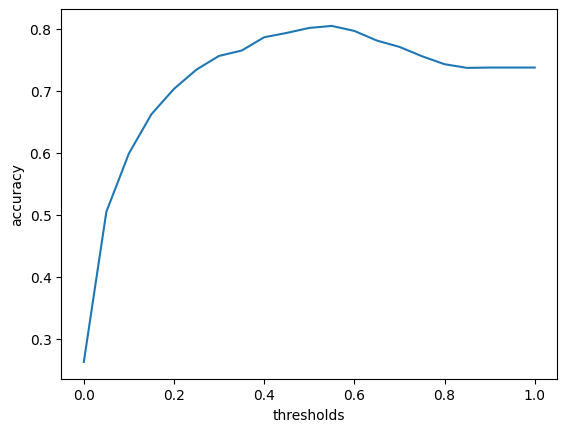

In [81]:
import seaborn as sns
sns.lineplot(x=thresholds , y=accuracies)
plt.xlabel('thresholds')
plt.ylabel('accuracy')

In [82]:
# small model accuracy
val_dict_small = df_val[small_subset].to_dict(orient = 'records')
X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[: , 1]
churn_small = y_pred_small >=0.5
accuracy_score(y_val , churn_small)

0.7758064516129032

Accuracy can be misleading when we deal with imbalance dataset

## ROC and AUC

### TPR and FPR

In [84]:
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:                  
    tp = ((y_pred[:,1] >= t) & (y_val == 1)).sum()   
    fp = ((y_pred[:,1] >= t) & (y_val == 0)).sum()   
    fn = ((y_pred[:,1] < t) & (y_val == 1)).sum()    
    tn = ((y_pred[:,1] < t) & (y_val == 0)).sum()    
    scores.append((t, tp, fp, fn, tn))

In [85]:
df_scores = pd.DataFrame(scores) 
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [86]:
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,488,1372,0,0
1,0.01,486,1220,2,152
2,0.02,484,1085,4,287
3,0.03,482,1018,6,354
4,0.04,479,962,9,410


In [87]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [88]:
df_scores.head()

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,488,1372,0,0,1.000000,1.000000
1,0.01,486,1220,2,152,0.995902,0.889213
2,0.02,484,1085,4,287,0.991803,0.790816
3,0.03,482,1018,6,354,0.987705,0.741983
4,0.04,479,962,9,410,0.981557,0.701166


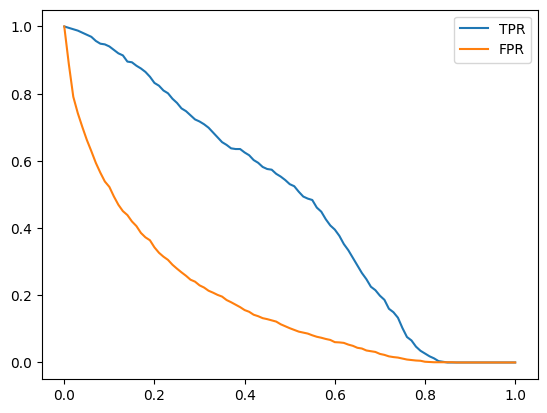

In [89]:
 plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
 plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
 plt.legend()

In [93]:
# function to calculate the confusion table
def tpr_fpr_dataframe(y_val , y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:                  
        tp = ((y_pred >= t) & (y_val == 1)).sum()   
        fp = ((y_pred >= t) & (y_val == 0)).sum()   
        fn = ((y_pred < t) & (y_val == 1)).sum()    
        tn = ((y_pred < t) & (y_val == 0)).sum()    
        scores.append((t, tp, fp, fn, tn))
    df_scores = pd.DataFrame(scores)                             
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn'] 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores
    
       

### Random model ROC

In [94]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))
df_rand = tpr_fpr_dataframe(y_val , y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,488,1372,0,0,1.000000,1.000000
10,0.1,439,1237,49,135,0.899590,0.901603
20,0.2,389,1104,99,268,0.797131,0.804665
30,0.3,357,954,131,418,0.731557,0.695335
40,0.4,305,832,183,540,0.625000,0.606414
50,0.5,259,703,229,669,0.530738,0.512391
60,0.6,206,566,282,806,0.422131,0.412536
70,0.7,157,417,331,955,0.321721,0.303936
80,0.8,105,295,383,1077,0.215164,0.215015
90,0.9,57,147,431,1225,0.116803,0.107143


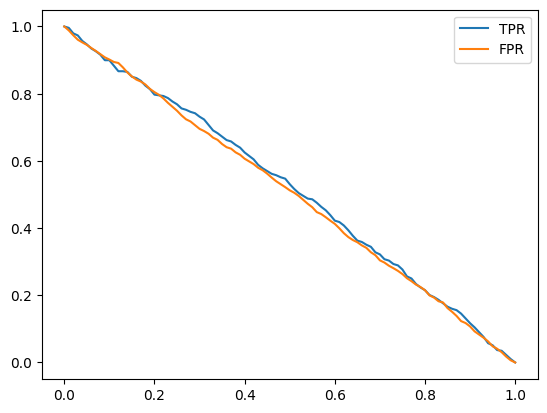

In [96]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

## Ideal model

In [99]:
num_neg = (y_val == 0).sum()   
num_pos = (y_val == 1).sum()

In [100]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])     
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

In [101]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

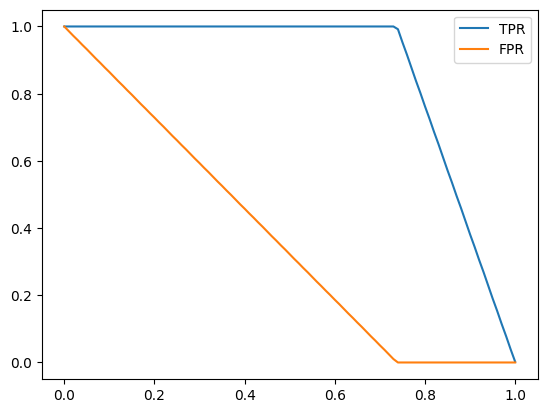

In [102]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()


In [105]:
num_neg/len(y_val)

np.float64(0.7376344086021506)

## ROC

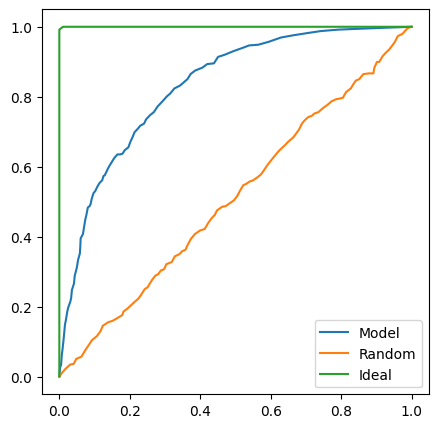

In [106]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='Model') 
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')    
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')   
plt.legend()

Text(0, 0.5, 'TPR')

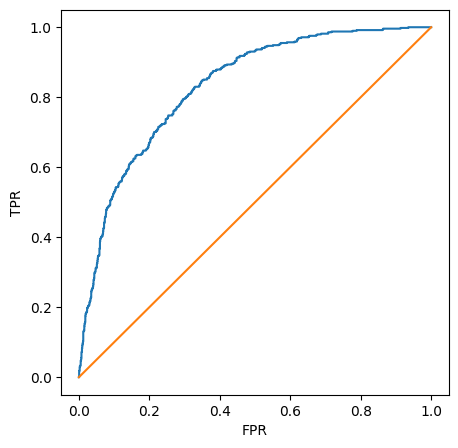

In [109]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_val , y_pred[:,1])
plt.figure(figsize = (5 , 5))
plt.plot(fpr , tpr)
plt.plot([0,1] , [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')

In [115]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred[:,1])
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

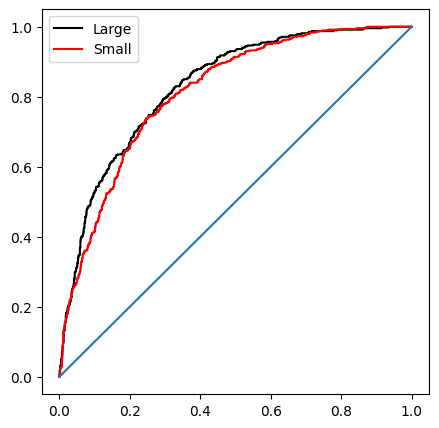

In [117]:
plt.figure(figsize=(5, 5))
plt.plot(fpr_large, tpr_large, color='black', label='Large')
plt.plot(fpr_small, tpr_small, color='red', label='Small')
plt.plot([0, 1], [0, 1])
plt.legend()

In [118]:
from sklearn.metrics import auc
auc(df_scores.fpr , df_scores.tpr)

np.float64(0.8301360942503465)

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val , y_pred[:,1])

np.float64(0.8302973999904412)

In [131]:
roc_auc_score(y_val , y_pred_small)

np.float64(0.8125530217941977)

Probabilistic interpretation of AUC

In [123]:
# score of all non-churning exemples
neg = y_pred[y_val ==0][:,1]

pos = y_pred[y_val ==1][:,1]

In [126]:
len(neg)

1372

In [132]:
np.random.seed(1)
neg_choices = np.random.randint(low = 0 , high = len(neg) , size = 1000000)
pos_choices = np.random.randint(low = 0 , high = len(pos) , size = 1000000)


In [133]:
(pos[pos_choices] > neg[neg_choices]).mean()

np.float64(0.829822)

## Parameter tunning

### K-folds cross-validation

In [134]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10 , shuffle = True , random_state = 1)


In [138]:
# train funcrion
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')  
    dv = DictVectorizer(sparse=False)                         
    dv.fit(cat)                                               
    X = dv.transform(cat)                                     
    model = LogisticRegression(solver='liblinear') 
    model.fit(X, y)
    return dv, model

In [139]:
# predict function
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')   
    X = dv.transform(cat)                                      
    y_pred = model.predict_proba(X)[:, 1]    
    return y_pred

In [140]:
# K-fold cross-validation
from sklearn.model_selection import KFold    

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [142]:
aucs = []
for train_idx, val_idx in kfold.split(full_df_train):        
    df_train = full_df_train.iloc[train_idx]   
    df_val = full_df_train.iloc[val_idx]
    y_train = df_train.churn.values            
    y_val = df_val.churn.values
    dv, model = train(df_train, y_train)  
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)   
    aucs.append(auc)
    

In [143]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


### Finding the best parameters

In [144]:
# Adjust the train function
def train(df, y, C):     
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', C=C)   
    model.fit(X, y)
    return dv, model

In [152]:
# Tunning the model
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    for train_idx, val_idx in kfold.split(full_df_train):
        df_train = full_df_train.iloc[train_idx]
        df_val = full_df_train.iloc[val_idx]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.819 ± 0.000
C=0.001, auc = 0.825 ± 0.006
C=0.001, auc = 0.818 ± 0.011
C=0.001, auc = 0.818 ± 0.010
C=0.001, auc = 0.824 ± 0.014
C=0.01, auc = 0.841 ± 0.000
C=0.01, auc = 0.844 ± 0.002
C=0.01, auc = 0.838 ± 0.008
C=0.01, auc = 0.836 ± 0.007
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.844 ± 0.000
C=0.1, auc = 0.845 ± 0.000
C=0.1, auc = 0.840 ± 0.006
C=0.1, auc = 0.838 ± 0.007
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.844 ± 0.000
C=0.5, auc = 0.845 ± 0.001
C=0.5, auc = 0.840 ± 0.006
C=0.5, auc = 0.838 ± 0.007
C=0.5, auc = 0.841 ± 0.008
C=1, auc = 0.844 ± 0.000
C=1, auc = 0.845 ± 0.001
C=1, auc = 0.840 ± 0.006
C=1, auc = 0.838 ± 0.007
C=1, auc = 0.841 ± 0.008
C=10, auc = 0.844 ± 0.000
C=10, auc = 0.845 ± 0.001
C=10, auc = 0.840 ± 0.006
C=10, auc = 0.838 ± 0.007
C=10, auc = 0.841 ± 0.009


In [153]:
y_train = full_df_train.churn.values
y_test = df_test.churn.values
dv, model = train(full_df_train, y_train, C=0.5)   
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)   
print('auc = %.3f' % auc)

auc = 0.858
